Data Crawling
========

In [8]:
#import packages
from bs4 import BeautifulSoup
import urllib.request
import csv
import time

In [9]:
#the url we want to crawl
url = 'https://www.yelp.com/search?find_desc=ice+cream&find_loc=10023&ns=1'

In [10]:
def shop_info(soup): # return the shops in current soup in a list
    shops=[]  # create an empty list to store shop information
    for i in soup.find_all('div',{'class':'lemon--div__373c0__1mboc largerScrollablePhotos__373c0__3FEIJ arrange__373c0__UHqhV border-color--default__373c0__2oFDT'}):
        if i.find('p').text.find('.') == -1:  #get shop ranking and filter out non-ranked advertisement
            continue
        #print(i.find('p').text)
        per_ranking=i.find('p').text.split('.')
        
        new_ranking=per_ranking[0] # extract shop ranking
        #print(new_ranking)

        per_shopname=i.find('a').text  # extract shop name
        #print(per_shopname)

        per_rating=str(i.find('span',{'class':'lemon--span__373c0__3997G display--inline__373c0__1DbOG border-color--default__373c0__2oFDT'}).find('div'))
        tmp_rating=per_rating.split('"')
        if len(tmp_rating)>1:
            new_rating=tmp_rating[1]
        else:
            new_rating='None'
        #print(new_rating)  # extract rating

        review_count=str(i.find('span',{'class':'lemon--span__373c0__3997G text__373c0__2pB8f reviewCount__373c0__2r4xT text-color--mid__373c0__3G312 text-align--left__373c0__2pnx_'}))[146:-7]
        #len('<span class="lemon--span__373c0__3997G text__373c0__2pB8f reviewCount__373c0__2r4xT text-color--mid__373c0__3G312 text-align--left__373c0__2pnx_">')=146
        #len('</span>')=7
        #print(review_count)# extract review count

        contact_info=i.find('div',{'class':'lemon--div__373c0__1mboc container__373c0__19wDx u-padding-l2 border-color--default__373c0__2oFDT text-align--right__373c0__3fmmn'})
        if contact_info.find('div',{'class':'lemon--div__373c0__1mboc border-color--default__373c0__2oFDT'}):
            if not contact_info.find('div',{'class':'lemon--div__373c0__1mboc border-color--default__373c0__2oFDT'}).find('span'):
                per_phone=contact_info.find('div',{'class':'lemon--div__373c0__1mboc border-color--default__373c0__2oFDT'}).text
            else:
                per_phone='None'
        else:
            per_phone='None'
        #print(per_phone) #extract phone

        if contact_info.find('address'):
            per_address= contact_info.find('address').text
        else:
            per_address='None'
        #print(per_address) #extract address

        if contact_info.find('div',{'class':'lemon--div__373c0__1mboc u-space-b1 border-color--default__373c0__2oFDT'}):
            per_district=contact_info.find('div',{'class':'lemon--div__373c0__1mboc u-space-b1 border-color--default__373c0__2oFDT'}).text
        else:
            per_district='None'
        #print(per_district) #extract district
        
        #populate the shop information row and apped to shop list
        shop_info = [new_ranking, per_shopname, new_rating, review_count, per_phone, per_address, per_district]
        shops.append(shop_info)
    return shops

In [18]:
#create a list to store shop information and create header line
shop_list = [['Ranking','Name of the shop','Rating','Number of reviews','Phone number','Detailed address','District information']]
for n in range(0,10):
    url_current=url+'&start='+str(n*10)
    print(url_current)
    ourUrl=urllib.request.urlopen(url_current)
    soup=BeautifulSoup(ourUrl,'html.parser')
    #print(soup.prettify())
    shops = shop_info(soup)
    print(shops)
    shop_list.extend(shops)
print(shop_list)

https://www.yelp.com/search?find_desc=ice+cream&find_loc=10023&ns=1&start=0
[['1', 'Van Leeuwen Artisan Ice Cream', '4.5 star rating', '12 reviews', '(917) 388-2904', '1250 6th Ave', 'Theater District'], ['2', 'Emack and Bolio’s', '4 star rating', '286 reviews', '(212) 362-2747', '389 Amsterdam Ave', 'Upper West Side'], ['3', 'Van Leeuwen Ice Cream', '4.5 star rating', '23 reviews', '(646) 368-9195', '253 Columbus Ave', 'Upper West Side'], ['4', 'Grom', '4 star rating', '594 reviews', '(212) 974-3444', '1796 Broadway', 'Midtown West'], ['5', 'Ample Hills Creamery', '4.5 star rating', '348 reviews', '(212) 582-9354', '600 11th Ave', "Hell's Kitchen"], ['6', 'Van Leeuwen Ice Cream Truck', '3.5 star rating', '118 reviews', '(718) 701-1630', 'None', 'Upper West Side'], ['7', 'Van Leeuwen Ice Cream', '3.5 star rating', '121 reviews', '(646) 952-0311', '448 Amsterdam Ave', 'Upper West Side'], ['8', 'Amorino Gelato', '4.5 star rating', '188 reviews', '(212) 877-5700', '414 Amsterdam Ave', 'Up

[['71', 'Jacques Torres Chocolate', '4 star rating', '27 reviews', '(646) 852-6624', '110 E 57th St', 'Midtown East'], ['72', 'The Jolly Goat Coffee Bar', '4.5 star rating', '335 reviews', '(646) 509-8957', '515 W 47th St', "Hell's Kitchen"], ['73', 'Mom’s Kitchen & Bar', '4 star rating', '622 reviews', '(646) 657-0080', '701 9th Ave', "Hell's Kitchen"], ['74', 'Junior’s Restaurant & Bakery - 45th St.', '4 star rating', '4437 reviews', '(212) 302-2000', '1515 Broadway', 'Theater District'], ['75', 'The Milling Room', '4 star rating', '442 reviews', '(212) 595-0380', '446 Columbus Ave', 'Upper West Side'], ['76', 'Tasti D-Lite', '3.5 star rating', '7 reviews', '(212) 496-1466', '523 Amsterdam', 'Upper West Side'], ['77', 'Delicioso Coco Helado', '4.5 star rating', '18 reviews', 'None', 'SE Corner Of 96th And Broadway', 'Upper West Side'], ['78', 'Sant Ambroeus', '4 star rating', '373 reviews', '(212) 570-2211', '1000 Madison Ave', 'Upper East Side'], ['79', 'Storico', '4 star rating', '

In [23]:
#store review into a csv file 
with open('100IceCreamShop.csv','w',newline='', encoding='utf-8') as f:
    wr = csv.writer(f,dialect='excel')
    wr.writerows(shop_list)

Draw bar chart
============

In [21]:
import pandas as pd
import re
%matplotlib inline

In [25]:
shop=pd.read_csv('100IceCreamShop.csv')

In [26]:
# proprocess rating number
shop['Rating number'] = shop['Rating'].str.split(expand=True)[0]
del shop['Rating']
shop['Rating number'] = pd.to_numeric(shop['Rating number'],errors='coerce')
shop.head()

,Ranking,Name of the shop,Number of reviews,Phone number,Detailed address,District information,Rating number
0,1,Van Leeuwen Artisan Ice Cream,12 reviews,(917) 388-2904,1250 6th Ave,Theater District,4.5
1,2,Emack and Bolio’s,286 reviews,(212) 362-2747,389 Amsterdam Ave,Upper West Side,4.0
2,3,Van Leeuwen Ice Cream,23 reviews,(646) 368-9195,253 Columbus Ave,Upper West Side,4.5
3,4,Grom,594 reviews,(212) 974-3444,1796 Broadway,Midtown West,4.0
4,5,Ample Hills Creamery,348 reviews,(212) 582-9354,600 11th Ave,Hell's Kitchen,4.5


In [20]:
shop.groupby('District information')['Name of the shop'].agg(['count'])

,count
District information,
Hell's Kitchen,12
Midtown East,8
Midtown West,9
Theater District,13
Upper East Side,12
Upper West Side,42


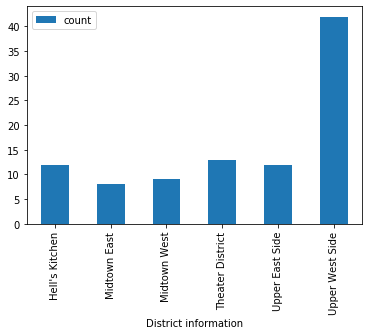

In [19]:
shop.groupby('District information')['Name of the shop'].agg(['count']).plot(kind='bar')

In [18]:
shop.groupby('District information')['Rating number'].mean()

District information
Hell's Kitchen      4.250000
Midtown East        3.875000
Midtown West        3.944444
Theater District    4.000000
Upper East Side     3.750000
Upper West Side     3.976190
Name: Rating number, dtype: float64

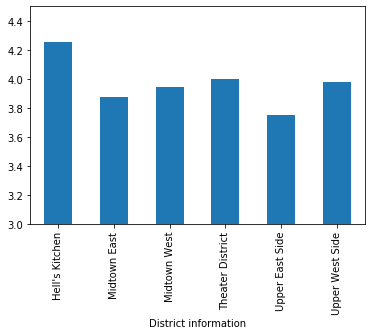

In [17]:
shop.groupby('District information')['Rating number'].mean().plot(kind='bar',ylim=(3,4.5))